In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions

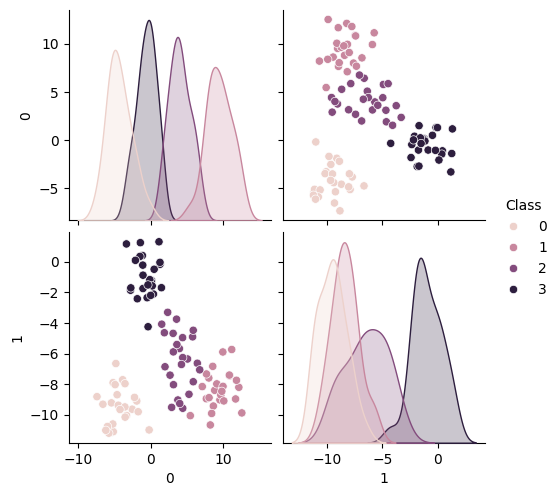

In [4]:
N=4
D=2
X,y=make_blobs(n_samples=100, centers=N, n_features=2, random_state=None, cluster_std=1.5)
df=pd.DataFrame(X)
df['Class']=y
sns.pairplot(df, hue='Class')

In [7]:
sc= StandardScaler()
##del[df['Class']]
df_t=pd.DataFrame(sc.fit_transform(df))
df_t.describe()

,0,1
count,1.000000e+02,1.000000e+02
mean,1.021405e-16,-2.553513e-16
std,1.005038e+00,1.005038e+00
min,-1.777624e+00,-1.371730e+00
25%,-7.956377e-01,-7.806688e-01
50%,-1.174761e-01,-3.391216e-01
75%,8.162695e-01,7.509179e-01
max,1.944310e+00,2.139418e+00


Иерархическая кластеризация

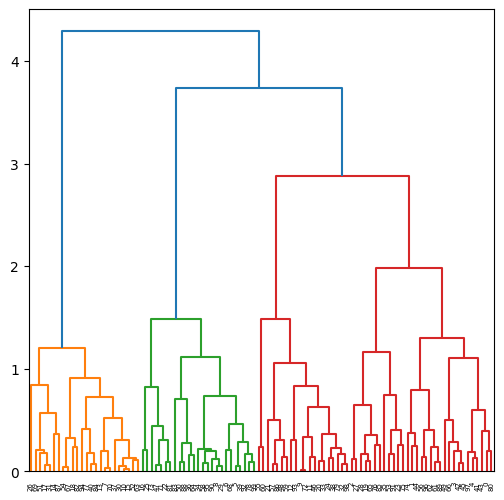

In [8]:
row_dist=pdist(df_t, metric='euclidean')
mergins=linkage(row_dist, method='complete')
plt.figure(figsize=(6,6))
dendrogram(mergins)
plt.show()

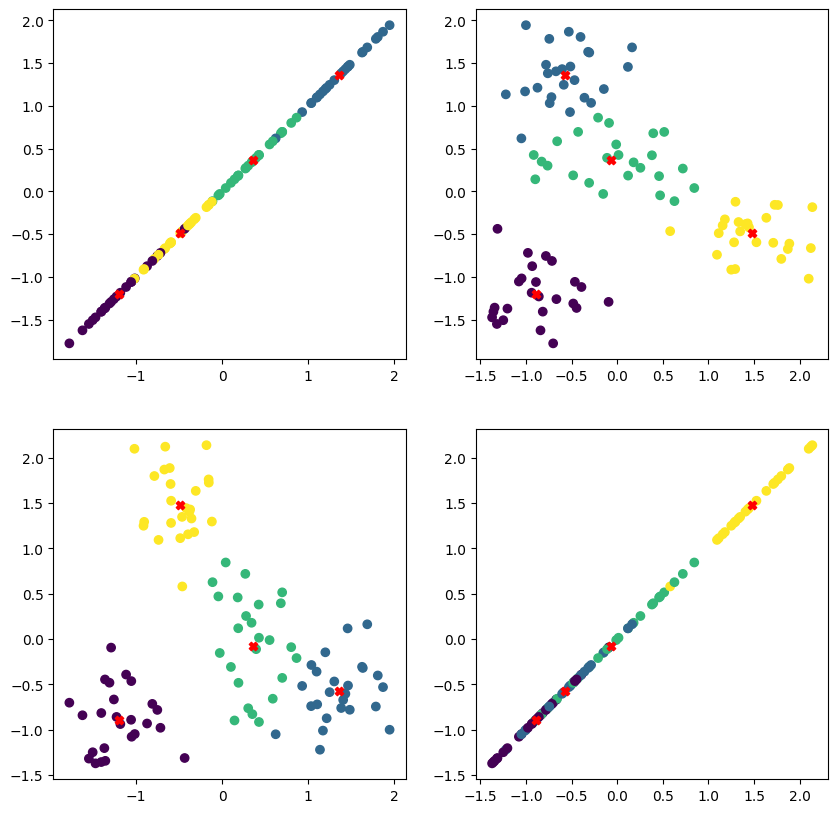

In [9]:
model=KMeans(n_clusters=N, max_iter=1000)
model.fit(df_t)
plt.figure(figsize=(10, 10))
k=0
for i in range(D):
    for j in range(D):
        k=k+1
        sub=plt.subplot(D, D, k)
        sub.scatter(df_t[j], df_t[i], c=y)
        plt.scatter(model.cluster_centers_[:,j], model.cluster_centers_[:,i], marker='X', c='red')

In [10]:
def lda_qda(field1, field2, type_model, k):
    splot=plt.subplot(D, D, k)
    x=df_t[[field1, field2]].values
    model=type_model
    model_pair=model.fit(x, y)
    plot_decision_regions(
        X=x,
        y=y,
        clf=model_pair
    )
    return splot

c:\Users\Денис\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
c:\Users\Денис\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
c:\Users\Денис\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
c:\Users\Денис\AppData\Local\Progr

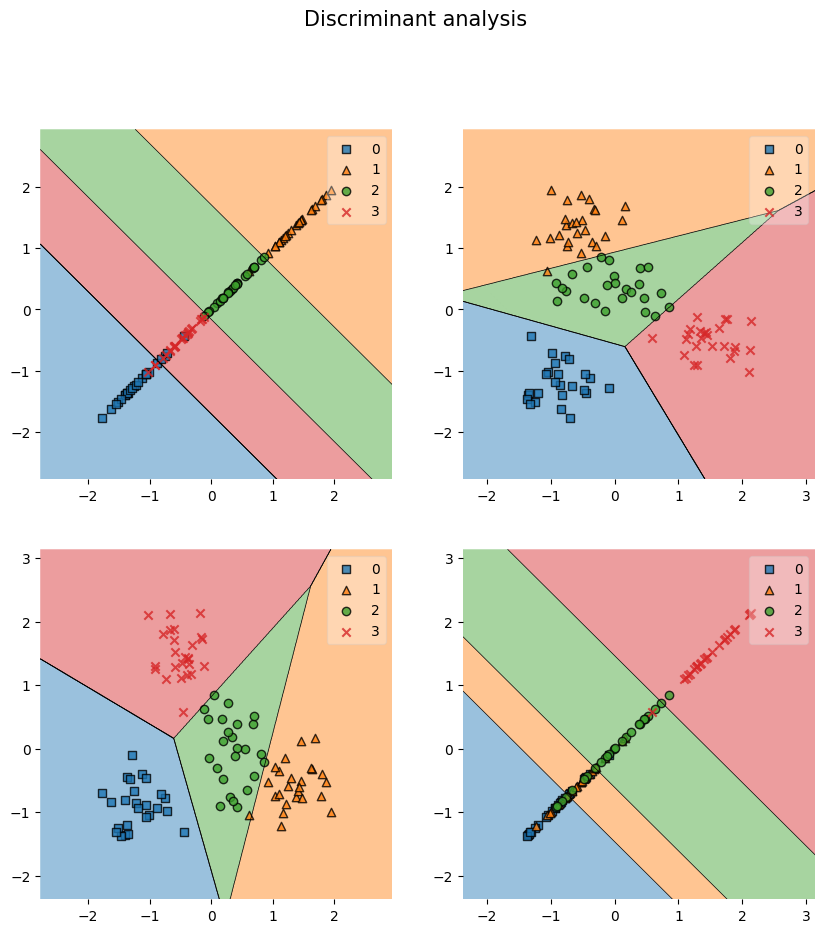

In [11]:
plt.figure(figsize=(10, 10), facecolor='white')
plt.suptitle('Discriminant analysis', y=1, fontsize=15)
k=0
for i in range(D):
    for j in range(D):
        k=k+1
        splot=lda_qda(j, i, lda(), k)
plt.show()

c:\Users\Денис\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\Денис\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\Денис\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\Денис\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is 

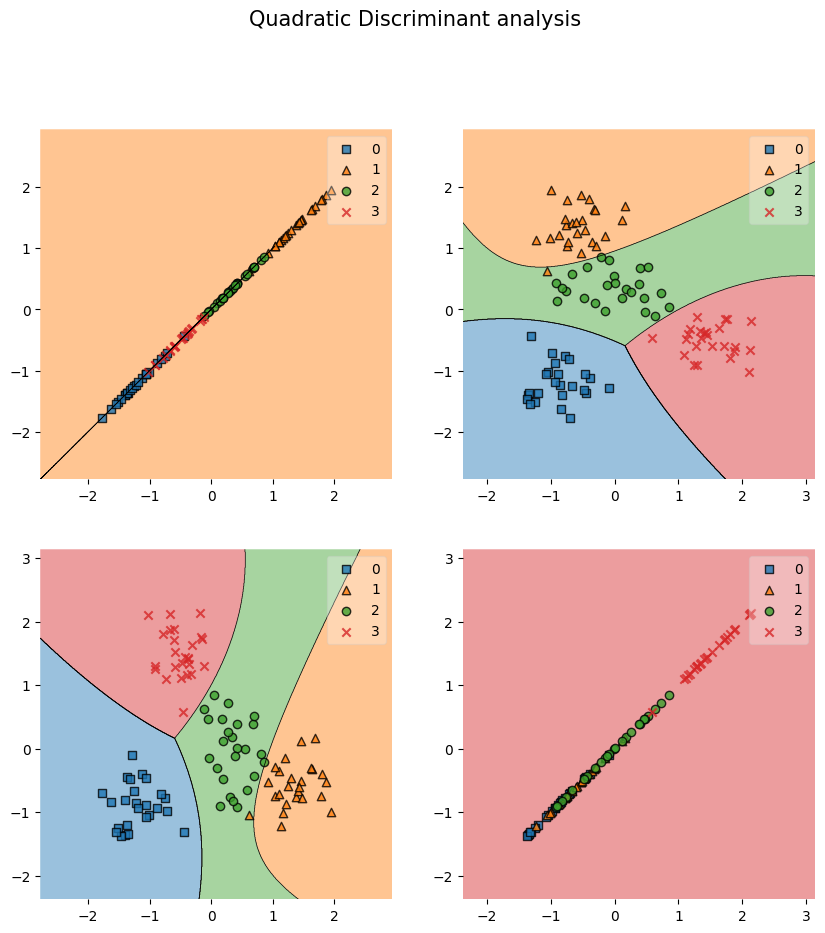

In [12]:
plt.figure(figsize=(10, 10), facecolor='white')
plt.suptitle('Quadratic Discriminant analysis', y=1, fontsize=15)
k=0
for i in range(D):
    for j in range(D):
        k=k+1
        splot=lda_qda(j, i, qda(), k)
plt.show()

In [ ]:
X_train, X_test